# 图像梯度

### 目标

在本章中，我们将学习：
- 查找图像梯度，边缘等
- 我们将看到以下函数：**cv.Sobel**()，**cv.Scharr**()，**cv.Laplacian**()等

### 理论

OpenCV提供三种类型的梯度滤波器或高通滤波器，即Sobel，Scharr和Laplacian。我们将看到他们每一种。

### 1. Sobel 和 Scharr 算子

Sobel算子是高斯平滑加微分运算的联合运算，因此它更抗噪声。逆可以指定要采用的导数方向，垂直或水平（分别通过参数yorder和xorder）。逆还可以通过参数ksize指定内核的大小。如果`ksize = -1`，则使用3x3 Scharr滤波器，比3x3 Sobel滤波器具有更好的结果。请参阅文档以了解所使用的内核。

### 2. Laplacian 算子

它计算了由关系$\Delta src = \frac{\partial ^2{src}}{\partial x^2} + \frac{\partial ^2{src}}{\partial y^2}$给出的图像的拉普拉斯图,它是每一阶导数通过Sobel算子计算。如果`ksize = 1`,然后使用以下内核用于过滤:

$$
kernel = \begin{bmatrix} 0 & 1 & 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0 \end{bmatrix}
$$

### 代码

下面的代码显示了单个图表中的所有算子。所有内核都是`5x5`大小。输出图像的深度通过`-1`得到结果的`np.uint8`型。

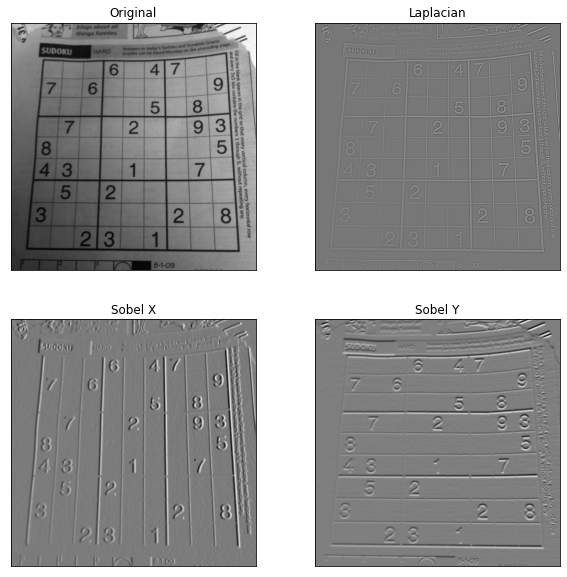

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('data/sudoku.png', cv.IMREAD_GRAYSCALE)

assert img is not None, "file could not be read, check with os.path.exists()"

laplacian = cv.Laplacian(img,cv.CV_64F)
sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=5)

plt.figure(figsize=(10, 10))

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

### 一个重要事项

在我们的最后一个示例中，输出数据类型为`cv.CV_8U`或`np.uint8`。但这有一个小问题。黑色到白色的过渡被视为正斜率（具有正值），而白色到黑色的过渡被视为负斜率（具有负值）。因此，当您将数据转换为np.uint8时，所有负斜率均​​设为零。简而言之，您会错过这一边缘信息。

如果要检测两个边缘，更好的选择是将输出数据类型保留为更高的形式，例如`cv.CV_16S`，`cv.CV_64F`等，取其绝对值，然后转换回`cv.CV_8U`。
下面的代码演示了用于水平Sobel滤波器和结果差异的此过程。

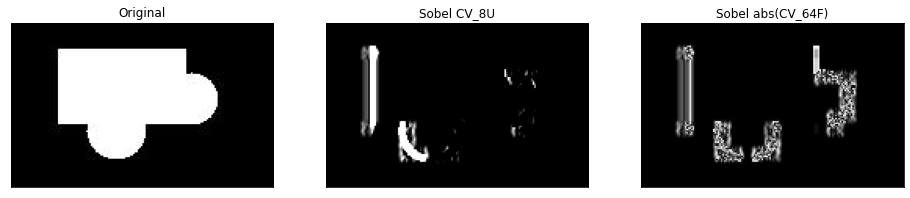

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('data/contour.jpg', cv.IMREAD_GRAYSCALE)

# Output dtype = cv.CV_8U
sobelx8u = cv.Sobel(img,cv.CV_8U,1,0,ksize=5)

# Output dtype = cv.CV_64F. Then take its absolute and convert to cv.CV_8U
sobelx64f = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)

abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)

plt.figure(figsize=(16, 8))

plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])

plt.show()

### 附加资源

### 练习